In [ ]:
%pip install tensorflow

# Build, Train, and Evaluate Neural Networks for a Binary Classification Task

In [160]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras import backend as K

In [161]:
seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

## Phase 1: Data Analysis & Preparation

Data source: Rabie El Kharoua. (2024). 🛍️ Predict Customer Purchase Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8725150

In [2]:
# load dataset
X = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, :-2]
y = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, [-1]]

In [3]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,40,1,66120.267939,8,0,30.568601,0
1,20,1,23579.773583,4,2,38.240097,0
2,27,1,127821.306432,11,2,31.633212,1
3,24,1,137798.623120,19,3,46.167059,0
4,31,1,99300.964220,19,1,19.823592,0


In [4]:
y.head()

,PurchaseStatus
0,1
1,0
2,1
3,1
4,1


Min-max normalize the data.

In [5]:
# min-max normalize 
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X_norm = (X-min_vals)/(max_vals-min_vals)
X_norm.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,0.423077,1.0,0.355351,0.40,0.00,0.500925,0.0
1,0.038462,1.0,0.027571,0.20,0.50,0.631052,0.0
2,0.173077,1.0,0.830766,0.55,0.50,0.518983,1.0
3,0.115385,1.0,0.907642,0.95,0.75,0.765512,0.0
4,0.250000,1.0,0.611013,0.95,0.25,0.318664,0.0


Visualize the distribution of each feature. The first plot contains the distributions before normalization. The second plot conatins the distributions after normalization.

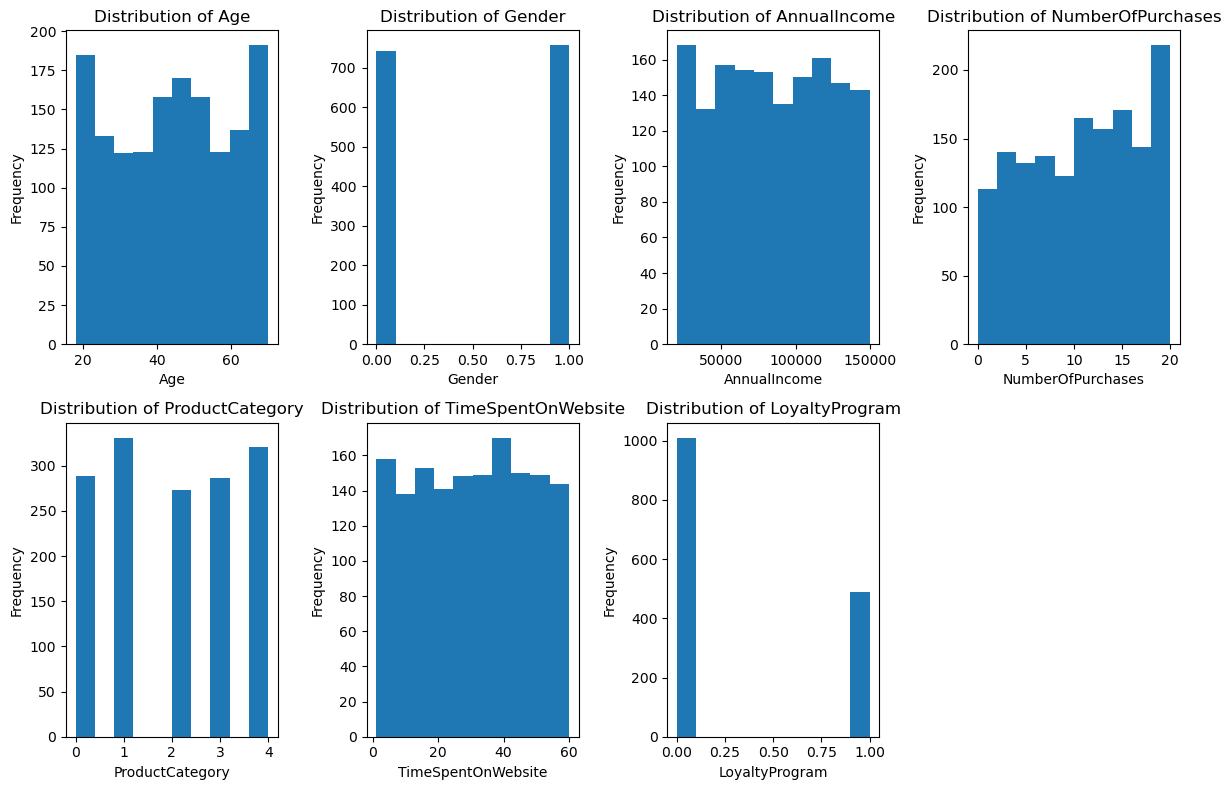

In [6]:
# visualizations before normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X.columns[idx]
    ax.hist(X[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_features.png')
plt.show()

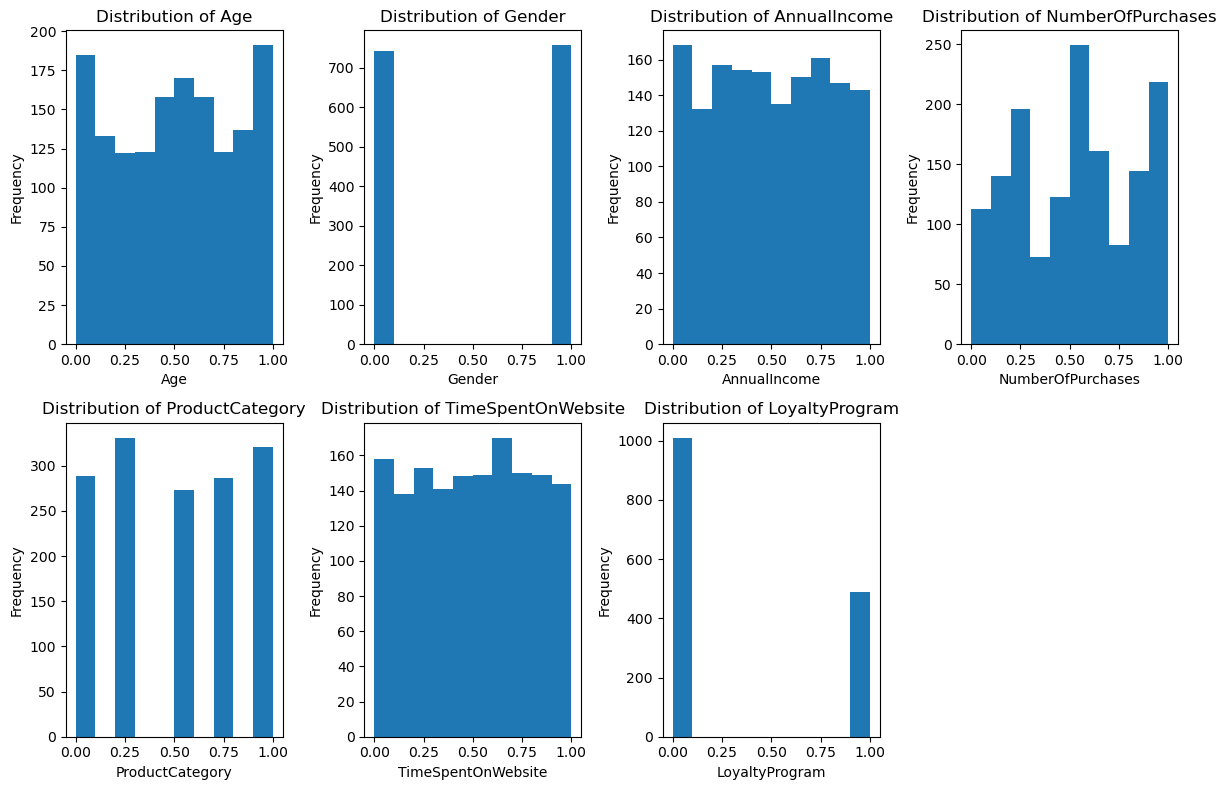

In [7]:
# visualizations after normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X_norm.columns[idx]
    ax.hist(X_norm[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_normalized_features.png')
plt.show()

Describe the range of the values of the features, including mean, median, minimum, and maximum.

In [8]:
# range of values
for col in X.columns:
    print(f'The mean of {col} is {round(X[col].mean(), 2)}.')
    print(f'The median of {col} is {round(X[col].median(), 2)}.')
    print(f'The mininimum value of {col} is {round(X[col].min(), 2)}.')
    print(f'The maximum value of {col} is {round(X[col].max(), 2)}.')
    print('=====================================================')

The mean of Age is 44.3.
The median of Age is 45.0.
The mininimum value of Age is 18.
The maximum value of Age is 70.
The mean of Gender is 0.5.
The median of Gender is 1.0.
The mininimum value of Gender is 0.
The maximum value of Gender is 1.
The mean of AnnualIncome is 84249.16.
The median of AnnualIncome is 83699.58.
The mininimum value of AnnualIncome is 20001.51.
The maximum value of AnnualIncome is 149785.18.
The mean of NumberOfPurchases is 10.42.
The median of NumberOfPurchases is 11.0.
The mininimum value of NumberOfPurchases is 0.
The maximum value of NumberOfPurchases is 20.
The mean of ProductCategory is 2.01.
The median of ProductCategory is 2.0.
The mininimum value of ProductCategory is 0.
The maximum value of ProductCategory is 4.
The mean of TimeSpentOnWebsite is 30.47.
The median of TimeSpentOnWebsite is 30.94.
The mininimum value of TimeSpentOnWebsite is 1.04.
The maximum value of TimeSpentOnWebsite is 59.99.
The mean of LoyaltyProgram is 0.33.
The median of LoyaltyPr

Check the distribution of the target to make sure it's not imbalanced.

In [9]:
# checking distribution of output
perc_zero = round((len(y[y['PurchaseStatus']==0]) / len(y))*100, 2)
print(f'The percentage of purchase is {perc_zero}%')
print(f'The percentage of no purchase is {100 - perc_zero}%')

The percentage of purchase is 56.8%
The percentage of no purchase is 43.2%


## Phase 2: Build a model to overfit the entire dataset

In [10]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [143]:
keras.utils.set_random_seed(123)

In [47]:
# training logistic regression model
model = Sequential()
model.add(Dense(1, input_dim=len(X_norm.columns), activation='sigmoid'))

C:\Users\megan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [49]:
model.fit(x=X_norm, y=y, epochs=1024, verbose=1)

Epoch 1/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5362 - loss: 0.6922
Epoch 2/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 0.6801
Epoch 3/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 0.6723
Epoch 4/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 0.6665
Epoch 5/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 0.6618
Epoch 6/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 0.6576
Epoch 7/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.6537
Epoch 8/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.6501
Epoch 9/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - loss: 0.6465
Epoch 10/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - loss: 0.6431
Epoch 11/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6398
Epoch 12/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Accuracy isn't increasing as epochs increase, so I will add layers.

In [54]:
# adding layers
model = Sequential()
model.add(keras.Input(shape=(len(X_norm.columns), )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,153 (1.10 MB)

 Trainable params: 288,153 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [57]:
model.fit(x=X_norm, y=y, epochs=1024, verbose=1)

Epoch 1/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6167 - loss: 0.6738
Epoch 2/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.6192
Epoch 3/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5728
Epoch 4/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.5333
Epoch 5/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.5162
Epoch 6/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.5094
Epoch 7/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.5036
Epoch 8/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7771 - loss: 0.4991
Epoch 9/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7761 - loss: 0.4975
Epoch 10/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4942
Epoch 11/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.4913
Epoch 12/1024
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

## Phase 3: Model selection & evaluation

Doing an 80/20 train test split. Set seed so values are consistent.

In [85]:
# shuffle index order to randomize
random.seed(123)
shuffled_idx = np.arange(len(X))
random.shuffle(shuffled_idx)
print(shuffled_idx)

[  9 817 613 ... 178 548 107]


In [86]:
# get top 80% of shuffled indices for train, rest for test
num_train = int(0.8*len(X))
train_idx = shuffled_idx[:num_train]
test_idx = shuffled_idx[num_train:]

In [87]:
# make train and test datasets
X_train = X.iloc[train_idx, :]
Y_train = y.iloc[train_idx, :]
X_test = X.iloc[test_idx, :]
Y_test = y.iloc[test_idx, :]

In [90]:
# normalizing
min_vals = X_train.min(axis=0)
max_vals = X_train.max(axis=0)
X_train_norm = (X_train-min_vals)/(max_vals-min_vals)
X_test_norm = (X_test-min_vals)/(max_vals-min_vals)

start training models, increasing size over time

for each model, make a learning curve plot (y = accuracy, x = number of epochs) for both train and test

use multiple metrics like precision, recall, F1 score

keep track of values in a table

use model checkpointing to store versions of the model during training

Create columns for table.

In [303]:
models = []
num_epochs = []
train_accs = []
train_losses = []
test_accs = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

Create random baseline classifier

In [304]:
# random baseline classifier
def random_classifier(X_train, X_test, Y_train, Y_test):
    model = "random baseline classifier"
    train_pred = np.array([])
    test_pred = np.array([])
    for row in Y_train['PurchaseStatus']:
        pred1 = random.randint(0, 1)
        train_pred = np.append(train_pred, pred1)
        
    for row in Y_test['PurchaseStatus']:
        pred2 = random.randint(0, 1)
        test_pred = np.append(test_pred, pred2)
        
    num_epochs = "--"
    train_acc = round(((((len(Y_train['PurchaseStatus']) - sum(Y_train['PurchaseStatus'])) / len(Y_train['PurchaseStatus'])) *  ((len(train_pred) - sum(train_pred)) / len(train_pred)))
                + ((sum(Y_train['PurchaseStatus']) / len(Y_train['PurchaseStatus'])) * (sum(train_pred) / len(train_pred)))), 2)
    test_acc = round(((((len(Y_test['PurchaseStatus']) - sum(Y_test['PurchaseStatus'])) / len(Y_test['PurchaseStatus'])) *  ((len(test_pred) - sum(test_pred)) / len(test_pred)))
                + ((sum(Y_test['PurchaseStatus']) / len(Y_test['PurchaseStatus'])) * (sum(test_pred) / len(test_pred)))), 2)
    
    train_loss = -np.mean(Y_train['PurchaseStatus'] * np.log(np.clip(train_pred, 1e-15, 1 - 1e-15)) + (1 - Y_train['PurchaseStatus']) * np.log(1 - np.clip(train_pred, 1e-15, 1 - 1e-15)))
    test_loss = -np.mean(Y_test['PurchaseStatus'] * np.log(np.clip(test_pred, 1e-15, 1 - 1e-15)) + (1 - Y_test['PurchaseStatus']) * np.log(1 - np.clip(test_pred, 1e-15, 1 - 1e-15)))
                         
    tp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 1))
    fp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 0))
    fn = np.sum(np.logical_and(test_pred == 0, Y_test['PurchaseStatus'] == 1))

    precision = round(tp / (tp + fp), 2)
    recall = round(tp / (tp + fn), 2)
    f1_score = round(2 * ((precision * recall) / (precision + recall)), 2)
    return model, num_epochs, train_acc, train_loss, test_acc, test_loss, precision, recall, f1_score

In [305]:
metrics = random_classifier(X_train_norm, X_test_norm, Y_train, Y_test)
mylists = [models, num_epochs, train_accs, train_losses, test_accs, test_losses, precisions, recalls, f1_scores]
for m, lst in zip(metrics, mylists):
    lst.append(m)

Create logistic regression model

In [238]:
# logistic regression model
model = Sequential()
model.add(Dense(1, input_dim=len(X_train_norm.columns), activation='sigmoid'))

C:\Users\megan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [239]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_filepath = r"logreg_chkpts\model_epoch_{epoch:02d}-{val_accuracy:.2f}.keras"
callback_a = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [240]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [241]:
history = model.fit(x=X_train_norm, y=Y_train, validation_data=(X_test_norm, Y_test), epochs=512, verbose=1, callbacks=[callback_a])

Epoch 1/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4940 - loss: 0.7315 - val_accuracy: 0.4833 - val_loss: 0.7189
Epoch 2/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 0.7247 - val_accuracy: 0.4933 - val_loss: 0.7129
Epoch 3/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5174 - loss: 0.7187 - val_accuracy: 0.5067 - val_loss: 0.7069
Epoch 4/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5265 - loss: 0.7128 - val_accuracy: 0.5000 - val_loss: 0.7012
Epoch 5/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5324 - loss: 0.7070 - val_accuracy: 0.5267 - val_loss: 0.6955
Epoch 6/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5436 - loss: 0.7014 - val_accuracy: 0.5467 - val_loss: 0.6900
Epoch 7/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5549 - loss: 0.6958 - val_accuracy: 0.5533 - val_loss: 0.6847
Epoch 8/512
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5621 - loss: 0.6904 - val_accuracy: 0.5667 - v

In [285]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

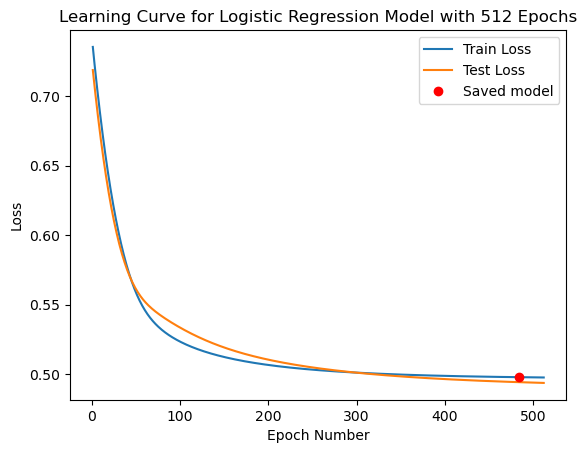

In [246]:
plt.figure()
plt.plot(np.arange(1, 513), train_loss, label='Train Loss')
plt.plot(np.arange(1, 513), val_loss, label='Test Loss')
plt.plot(484, train_loss[483],'ro', label='Saved model') 
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Learning Curve for Logistic Regression Model with 512 Epochs')
plt.legend()
plt.show()

In [286]:
model = keras.models.load_model(r"logreg_chkpts\model_epoch_484-0.78.keras")

In [287]:
test_pred = model.predict(X_test_norm)[0]
test_pred[test_pred >= 0.5] = 1
test_pred[test_pred < 0.5] = 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [288]:
tp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 1))
fp = np.sum(np.logical_and(test_pred == 1, Y_test['PurchaseStatus'] == 0))
fn = np.sum(np.logical_and(test_pred == 0, Y_test['PurchaseStatus'] == 1))

precision = round(tp / (tp + fp), 2)
recall = round(tp / (tp + fn), 2)
f1_score = round(2 * ((precision * recall) / (precision + recall)), 2)

In [306]:
metrics = ("logistic regression model", 512, train_acc[483], train_loss[483], val_acc[483], val_loss[483], precision, recall, f1_score)
mylists = [models, num_epochs, train_accs, train_losses, test_accs, test_losses, precisions, recalls, f1_scores]
for m, lst in zip(metrics, mylists):
    lst.append(m)

In [308]:
pd.DataFrame(
    {
        'Model': models,
        'Number of Epochs': num_epochs,
        'Train Accuracy': train_accs,
        'Train Loss': train_losses,
        'Test Accuracy': test_accs,
        'Test Loss': test_losses,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores
    }
)

,Model,Number of Epochs,Train Accuracy,Train Loss,Test Accuracy,Test Loss,Precision,Recall,F1 Score
0,random baseline classifier,--,0.500000,16.665181,0.50,17.960385,0.46,0.49,0.47
1,logistic regression model,512,0.765833,0.497781,0.78,0.494196,0.48,1.00,0.65
